In [1]:
#Loading the dataset
import pandas as pd
x = pd.read_csv("/Users/prathikpradeep/HC_One/data/processed/CandidateApplicationsData_features.csv")
y = pd.read_csv("/Users/prathikpradeep/HC_One/data/processed/CandidateApplicationsData_target.csv")

In [3]:
#standardizing Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# gives the optimun number of features as output . 
# evaluate RFE for FS
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
X, y =x,y
# create pipeline
mae=[]
min=10
max=30
for i in range(min,max):
 rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
 model = DecisionTreeRegressor()
 pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=2, n_jobs=-1, error_score='raise',)
 mae.append(mean(n_scores))
# report performance
 print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -14.493 (0.774)
MAE: -13.986 (1.267)
MAE: -13.431 (0.773)
MAE: -13.418 (1.423)
MAE: -13.834 (1.190)
MAE: -13.949 (0.846)
MAE: -14.063 (1.017)
MAE: -14.531 (0.207)
MAE: -14.309 (0.726)
MAE: -13.578 (0.870)
MAE: -14.692 (0.142)
MAE: -14.260 (0.082)
MAE: -14.794 (0.075)
MAE: -14.462 (0.094)
MAE: -14.677 (0.307)
MAE: -14.579 (0.101)
MAE: -14.674 (0.222)
MAE: -14.762 (0.191)
MAE: -14.430 (0.316)
MAE: -14.470 (0.396)


#The Graph show that the optimum feature size is 



In [ ]:
import numpy as np2
mae.index(np.max(mae))+10

13

Text(0.5, 1.0, 'Number of Features vs negative mean absolute error')

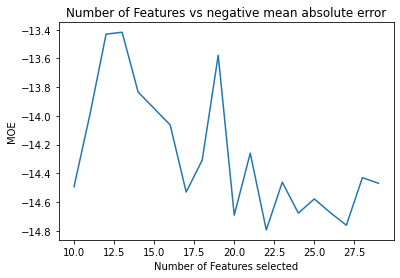

In [ ]:
import numpy as np
from matplotlib import pyplot
pyplot.plot(np.arange(min,max),mae)
pyplot.xlabel("Number of Features selected")
pyplot.ylabel("MOE")
pyplot.title("Number of Features vs negative mean absolute error")

In [ ]:
#the code gives the feature that are relevant 
from sklearn.feature_selection import RFE
# load data
X = x_scaled
Y = y
# feature extraction 
rfe_a = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=mae.index(np.max(mae))+10)
fit = rfe_a.fit(X, Y)
print("Num Features: %d" % fit.n_features_)

Num Features: 13


In [ ]:
d={"variables": x.columns,"result":fit.support_,"rank":fit.ranking_}
k=pd.DataFrame(d,index=None)
k

,variables,result,rank
0,Current Employee [1=YES / 0=No],True,1
1,Contracted hours,True,1
2,Job Title,False,3
3,Certification,False,23
4,Other,False,22
5,Accounts Skills,False,25
6,Admin Skills,False,17
7,FlexForce,False,18
8,General Skills,False,7
9,Health and Social Care,False,21


In [ ]:
k_selected=k[k["result"]==True]
k_selected

,variables,result,rank
0,Current Employee [1=YES / 0=No],True,1
1,Contracted hours,True,1
13,Category Code,True,1
14,Average age of the care homes within 15 min drive,True,1
19,2. Social rented,True,1
23,Total economically active,True,1
26,Total households 1,True,1
27,1 car or van in household,True,1
29,Total cars or vans,True,1
32,Married,True,1


In [ ]:
k_not_selected=k[k["result"]==False]
k_not_selected
     

,variables,result,rank
2,Job Title,False,3
3,Certification,False,23
4,Other,False,22
5,Accounts Skills,False,25
6,Admin Skills,False,17
7,FlexForce,False,18
8,General Skills,False,7
9,Health and Social Care,False,21
10,Home Manager Skills,False,24
11,Nurse Skills,False,20


#Feature selection completed

In [ ]:
k_not_selected.variables.to_list()

['Job Title',
 'Certification',
 'Other',
 'Accounts Skills',
 'Admin Skills',
 'FlexForce',
 'General Skills',
 'Health and Social Care ',
 'Home Manager Skills',
 'Nurse Skills',
 'Dutch',
 'Sum of care home beds within walking distance from candidates address',
 '1. Owned',
 '1.1 Owns outright',
 '1.2 Owns with a mortgage or loan',
 '2.1 Rented from Council (Local Authority)',
 '3. Private rented',
 '3.1 Private landlord or letting agency',
 'Unemployed aged 50-74',
 'Unemployed: never worked',
 '2 cars or vans in household',
 'Residents in households',
 'Schoolchildren or full-time students aged 4+ at their non term-time address',
 'In a registered same-sex civil partnership',
 'Separated (but still legally married or in a same-sex civil partnership)']

In [4]:
x_new=x.drop(['Job Title',
 'Certification',
 'Other',
 'Accounts Skills',
 'Admin Skills',
 'FlexForce',
 'General Skills',
 'Health and Social Care ',
 'Home Manager Skills',
 'Nurse Skills',
 'Dutch',
 'Sum of care home beds within walking distance from candidates address',
 '1. Owned',
 '1.1 Owns outright',
 '1.2 Owns with a mortgage or loan',
 '2.1 Rented from Council (Local Authority)',
 '3. Private rented',
 '3.1 Private landlord or letting agency',
 'Unemployed aged 50-74',
 'Unemployed: never worked',
 '2 cars or vans in household',
 'Residents in households',
 'Schoolchildren or full-time students aged 4+ at their non term-time address',
 'In a registered same-sex civil partnership',
 'Separated (but still legally married or in a same-sex civil partnership)'],axis=1)

#splitting the data into Test and train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x_new, y, test_size=0.2, random_state=42)
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.fit_transform(X_test)

#part 2 Job Title predicting

In [29]:
x_job_title=x_new
x_job_title['service_length']=y['length of service in months']
y_job_title=x['Job Title']
X_train_job, X_test_job, y_train_job, y_test_job = train_test_split( x_job_title, y_job_title, test_size=0.2, random_state=42)
x_new=x_new.drop('service_length',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
parameters = {'criterion':('friedman_mse', 'squared_error'), 'max_depth':np.arange(1,4),'min_impurity_decrease':np.arange(0,0.2,0.05),'min_samples_leaf':(1,2),'n_estimators':[100,200]}
model=GradientBoostingClassifier()
clf_a = GridSearchCV(model, parameters,verbose=3,scoring='accuracy',cv=3)
clf_a.fit(X_train_job,y_train_job)
print(clf_a.best_params_) 

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3] END criterion=friedman_mse, max_depth=1, min_impurity_decrease=0.0, min_samples_leaf=1, n_estimators=100;, score=0.936 total time=   3.4s
[CV 2/3] END criterion=friedman_mse, max_depth=1, min_impurity_decrease=0.0, min_samples_leaf=1, n_estimators=100;, score=0.934 total time=   2.9s
[CV 3/3] END criterion=friedman_mse, max_depth=1, min_impurity_decrease=0.0, min_samples_leaf=1, n_estimators=100;, score=0.935 total time=   2.8s
[CV 1/3] END criterion=friedman_mse, max_depth=1, min_impurity_decrease=0.0, min_samples_leaf=1, n_estimators=200;, score=0.939 total time=   6.8s
[CV 2/3] END criterion=friedman_mse, max_depth=1, min_impurity_decrease=0.0, min_samples_leaf=1, n_estimators=200;, score=0.942 total time=   5.8s
[CV 3/3] END criterion=friedman_mse, max_depth=1, min_impurity_decrease=0.0, min_samples_leaf=1, n_estimators=200;, score=0.943 total time=   6.0s
[CV 1/3] END criterion=friedman_mse, max_depth=1, min_im

In [31]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100,max_depth=2, random_state=0,criterion='friedman_mse',min_samples_leaf=1,min_impurity_decrease=0)
clf.fit(X_train_job,y_train_job)
y_predict_job=clf.predict(X_test_job)
print(classification_report(y_test_job, y_predict_job))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2897
           1       0.84      0.49      0.62       242
           2       1.00      0.96      0.98       376

    accuracy                           0.95      3515
   macro avg       0.93      0.81      0.86      3515
weighted avg       0.95      0.95      0.95      3515



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_job, y_predict_job)
print(cm)

sns.heatmap(cm, annot=False, cmap='crest')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# predicting the interval of service length based on the candidate data. 

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np
from imblearn.over_sampling import RandomOverSampler
y['service_length_c']=pd.cut(y['length of service in months'],bins=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,1000] ,include_lowest=True,labels=np.arange(0,17)) # converting based on the power of 2
x_cat=x_new
y_cat=y['service_length_c']
oversampler = RandomOverSampler(random_state=42)
x_cat, y_cat = oversampler.fit_resample(x_cat, y_cat)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split( x_cat, y_cat, test_size=0.2, random_state=42)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
parameters = {'n_estimators':[10,20,30,50,100],'max_features':[5,10,12,6],'random_state':[0]}
model=BaggingClassifier()
clf_a_r = GridSearchCV(model, parameters,verbose=3,scoring='f1_weighted',cv=3)
clf_a_r.fit(X_train_cat, y_train_cat)
print(clf_a_r.best_params_) 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END max_features=5, n_estimators=10, random_state=0;, score=0.837 total time=   1.2s
[CV 2/3] END max_features=5, n_estimators=10, random_state=0;, score=0.842 total time=   1.2s
[CV 3/3] END max_features=5, n_estimators=10, random_state=0;, score=0.840 total time=   1.1s
[CV 1/3] END max_features=5, n_estimators=20, random_state=0;, score=0.844 total time=   2.3s
[CV 2/3] END max_features=5, n_estimators=20, random_state=0;, score=0.848 total time=   2.8s
[CV 3/3] END max_features=5, n_estimators=20, random_state=0;, score=0.845 total time=   3.1s
[CV 1/3] END max_features=5, n_estimators=30, random_state=0;, score=0.848 total time=   3.5s
[CV 2/3] END max_features=5, n_estimators=30, random_state=0;, score=0.852 total time=   3.4s
[CV 3/3] END max_features=5, n_estimators=30, random_state=0;, score=0.850 total time=   3.6s
[CV 1/3] END max_features=5, n_estimators=50, random_state=0;, score=0.855 total time=   6.8s

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
l_model = BaggingClassifier(random_state=0,n_estimators=100,max_features=10)
l_model.fit(X_train_cat, y_train_cat)
y_predict_cat=l_model.predict(X_test_cat)
print(classification_report(y_test_cat, y_predict_cat))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54       733
           1       0.73      0.66      0.70       751
           2       0.83      0.84      0.83       714
           3       0.89      0.92      0.91       764
           4       0.92      0.97      0.94       668
           5       0.94      0.99      0.96       745
           6       0.94      1.00      0.97       777
           7       0.95      0.99      0.97       730
           8       0.97      1.00      0.98       737
           9       0.99      0.99      0.99       778
          10       0.97      1.00      0.98       760
          11       0.96      1.00      0.98       712
          12       0.98      1.00      0.99       734
          13       0.97      1.00      0.99       738
          14       0.99      1.00      0.99       733
          15       0.98      1.00      0.99       719
          16       0.94      0.83      0.88       743

    accuracy              

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_cat, y_predict_cat)
print(cm)

sns.heatmap(cm, annot=False, cmap='crest')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()